Importing necessary libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


Read the data into a dataframe
Drop duplicates separately
Removing duplicate rows
Removing duplicate columns
Check if the columns exist before dropping
Removing redundant information within a column
Check the shape of the DataFrame after removing redundancy

In [12]:
# Read the data into a dataframe
loan = pd.read_csv("loan.csv", header=0, low_memory=False)
loan.drop_duplicates(inplace=True)  # Drop duplicates column separately
loan['int_rate'] = loan['int_rate'].str.replace('%', '', regex=True).astype(float)
loan['revol_util'] = loan['revol_util'].str.replace('%', '', regex=True).astype(float)
loan['term'] = loan['term'].str.replace('months', '', regex=True).astype(float)
loan['delinq_2yrs'] = loan['delinq_2yrs'].astype(int)
loan['inq_last_6mths'] = loan['inq_last_6mths'].astype(int)
loan['pub_rec'] = loan['pub_rec'].astype(int)
loan['loan_status'] = loan['loan_status'].astype('category')
loan['emp_length'] = loan['emp_length'].str.replace('years', '')
loan['emp_length'] = loan['emp_length'].str.replace('+', '')    # I am considering 10 as 10+ years
loan['emp_length'] = loan['emp_length'].str.replace('< 1', '0') # I am considering 0 as less than a year
loan['emp_length'] = pd.to_numeric(loan['emp_length'], errors='coerce').fillna(-1).astype(int)
null_columns = loan.columns[loan.isnull().all()].tolist()

# Drop the null columns from the dataframe.
# Reassign the result back to the 'loan' dataframe
loan = loan.drop(columns=null_columns)
# Replacing 'loan_data_cleaned' with 'loan' to use the processed DataFrame
loan_data_cleaned_info = loan[['int_rate', 'emp_title', 'emp_length', 'annual_inc', 'loan_amnt','title','last_pymnt_d','last_credit_pull_d','earliest_cr_line','issue_d']].head()
loan_data_cleaned_info['emp_title'] = loan_data_cleaned_info['emp_title'].fillna('Unknown') # Fill NaN values first
loan_data_cleaned_info['emp_title'] = loan_data_cleaned_info['emp_title'].str.upper()       # Then apply str.upper()
# Converting column to integer datatype
loan_data_cleaned_info['annual_inc'] = loan_data_cleaned_info['annual_inc'].astype(np.int64)

loan_data_cleaned_info['loan_amnt'] = loan_data_cleaned_info['loan_amnt'].astype(np.int64)
loan_data_cleaned_info['title'] =  loan_data_cleaned_info['title'].fillna('Unknown')

# Converting string DataFrame column to datetime
loan_data_cleaned_info['last_pymnt_date'] = loan_data_cleaned_info['last_pymnt_d'].apply(lambda x: datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)
loan_data_cleaned_info['last_credit_pull_d'] = loan_data_cleaned_info['last_credit_pull_d'].apply(lambda x: datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)
loan_data_cleaned_info['earliest_cr_line'] = loan_data_cleaned_info['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)
loan_data_cleaned_info['issue_d'] = loan_data_cleaned_info['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

print(loan.shape)
# Now you can inspect the shape and the info DataFrame
loan.info()

(39717, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39717 non-null  int64   
 1   member_id                   39717 non-null  int64   
 2   loan_amnt                   39717 non-null  int64   
 3   funded_amnt                 39717 non-null  int64   
 4   funded_amnt_inv             39717 non-null  float64 
 5   term                        39717 non-null  float64 
 6   int_rate                    39717 non-null  float64 
 7   installment                 39717 non-null  float64 
 8   grade                       39717 non-null  object  
 9   sub_grade                   39717 non-null  object  
 10  emp_title                   37258 non-null  object  
 11  emp_length                  39717 non-null  int64   
 12  home_ownership              39717 non-null  object  
 13  annu

In [13]:
loan.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,39717.0,NaN,NaN,NaN,683131.91306,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,NaN,NaN,NaN,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,NaN,NaN,NaN,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,NaN,NaN,NaN,10947.713196,7187.23867,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,NaN,NaN,NaN,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
term,39717.0,NaN,NaN,NaN,42.418007,10.622815,36.0,36.0,36.0,60.0,60.0
int_rate,39717.0,NaN,NaN,NaN,12.021177,3.724825,5.42,9.25,11.86,14.59,24.59
installment,39717.0,NaN,NaN,NaN,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19
grade,39717,7,B,12020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,39717,35,B3,2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Removing outliers using the IQR method
def remove_outliers(loan, column):
    Q1 = loan[column].quantile(0.25)
    Q3 = loan[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return loan[(loan[column] >= lower_bound) & (loan[column] <= upper_bound)]

# Removing outliers from  numerical columns
columns_to_check = ['loan_amnt', 'int_rate','annual_inc', 'dti','revol_bal','total_pymnt']

# Applying the outlier removal function to each column
for col in columns_to_check:
    loan = remove_outliers(loan, col)

# Checking the shape of the data after outlier removal
loan.shape

(33769, 57)

Seprating the numeric & catogory data

In [15]:
column_category=loan.select_dtypes(include=['object']).columns
print(column_category)

column_numerical = loan.select_dtypes(include=np.number).columns.tolist()
print(column_numerical)


Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


# univariant analysis

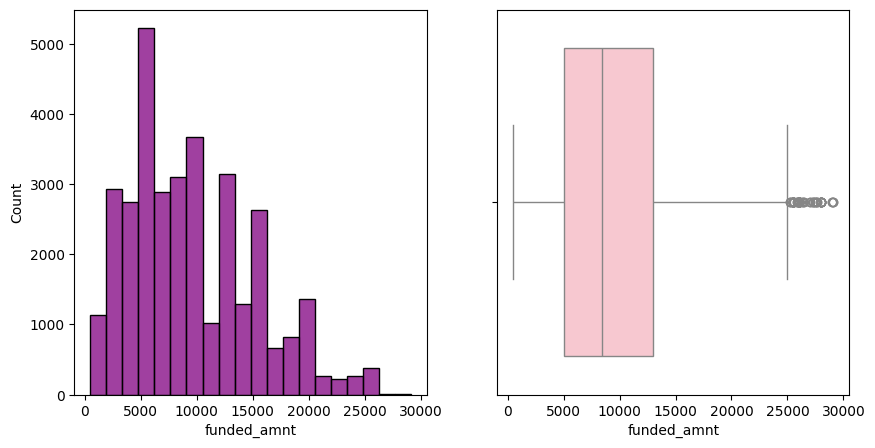

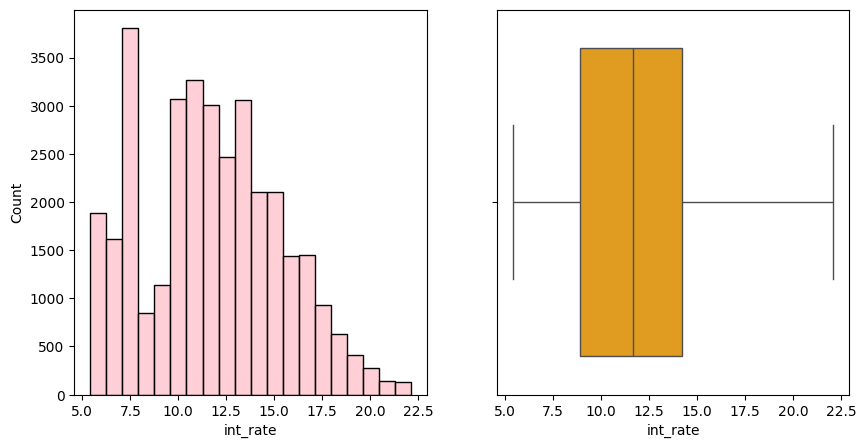

In [28]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(loan, x="funded_amnt", bins=20,  color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Bank_Funded')
sns.boxplot(loan, x="funded_amnt", color='pink', ax=axs[1])
#axs[1].set_title('Bank_Investment')
plt.show()
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(loan, x="int_rate", bins=20, color='pink',kde=False, ax=axs[0])
#axs[0].set_title('Bank Rate of Interest')
sns.boxplot(loan, x="int_rate",color='orange', ax=axs[1])
#axs[1].set_title('Bank Rate of Interest')
plt.show()


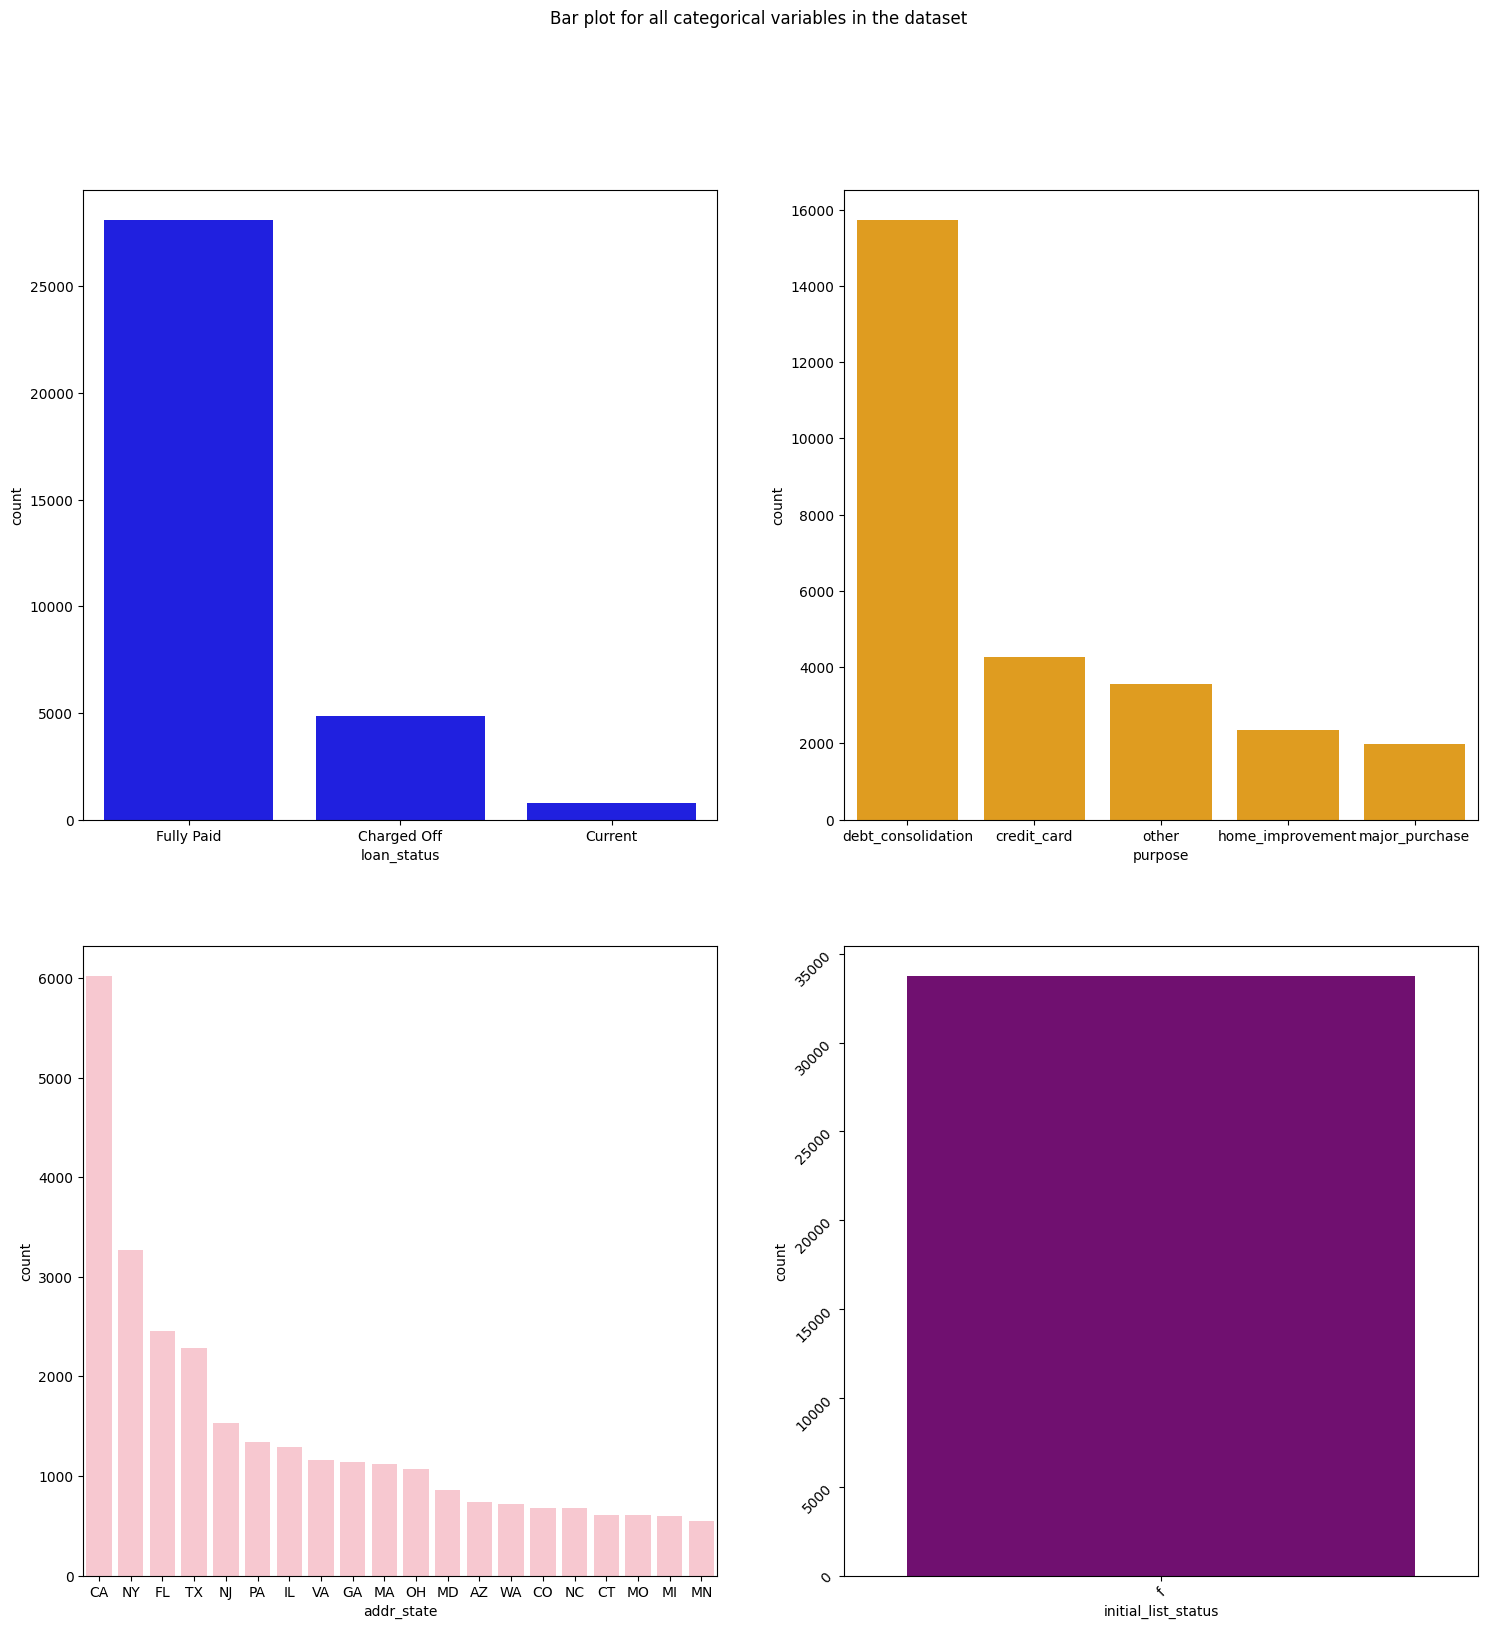

In [23]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'loan_status', data = loan, color = 'blue',
              order = loan['loan_status'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'purpose', data = loan, color = 'orange',
              order = loan['purpose'].value_counts().index[:5]);
sns.countplot(ax = axes[1, 0], x = 'addr_state', data = loan, color = 'pink',
              order = loan['addr_state'].value_counts().index[:20]);
sns.countplot(ax = axes[1, 1], x = 'initial_list_status', data = loan, color = 'purple',
              order = loan['initial_list_status'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);

Bivariate Analysis

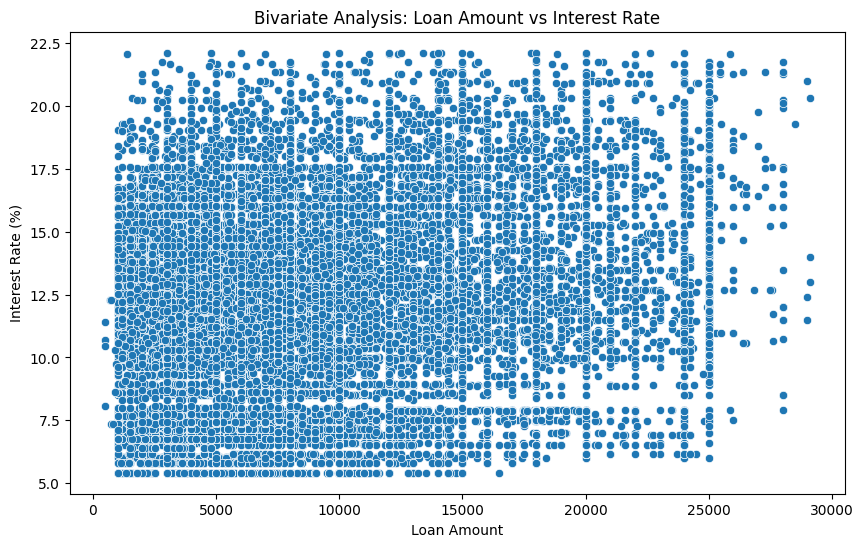

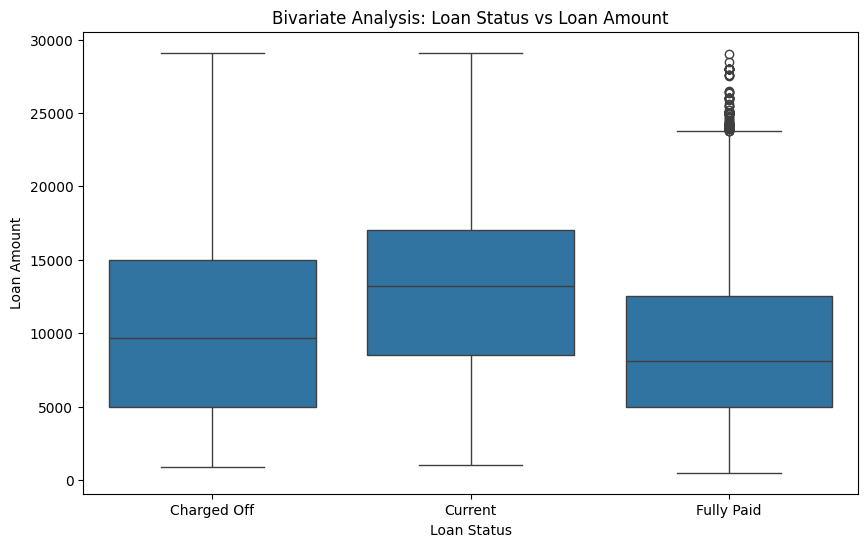

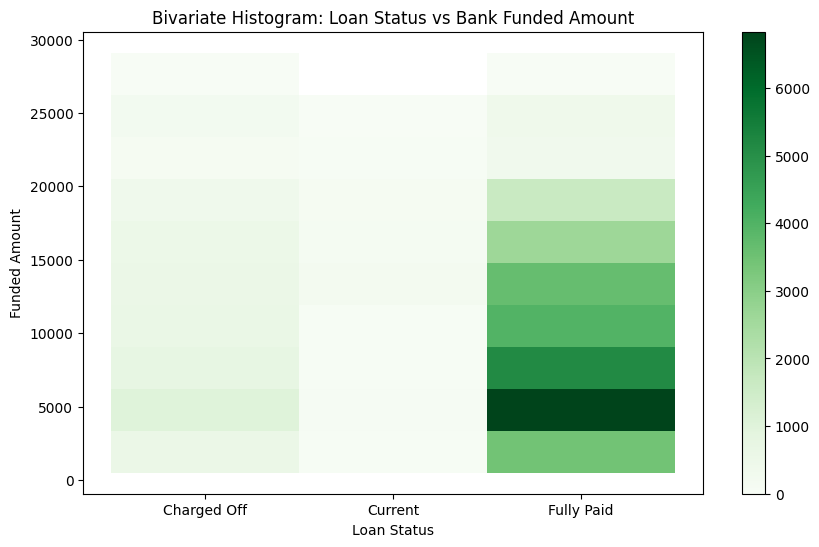

In [24]:
# Bivariate Analysis: Loan Amount vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan)
plt.title('Bivariate Analysis: Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()

# Bivariate Analysis: Loan Status vs Loan Amount (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan)
plt.title('Bivariate Analysis: Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()




# Plotting the bivariate histogram with a heatmap-like display
plt.figure(figsize=(10, 6))
sns.histplot(x='loan_status', y='funded_amnt', data=loan, bins=10, cmap='Greens', cbar=True)
plt.title('Bivariate Histogram: Loan Status vs Bank Funded Amount')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount')
plt.show()



<ipython-input-25-2aa05d9c78b5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby('loan_status')['funded_amnt'].mean().plot(kind='bar', color='blue')


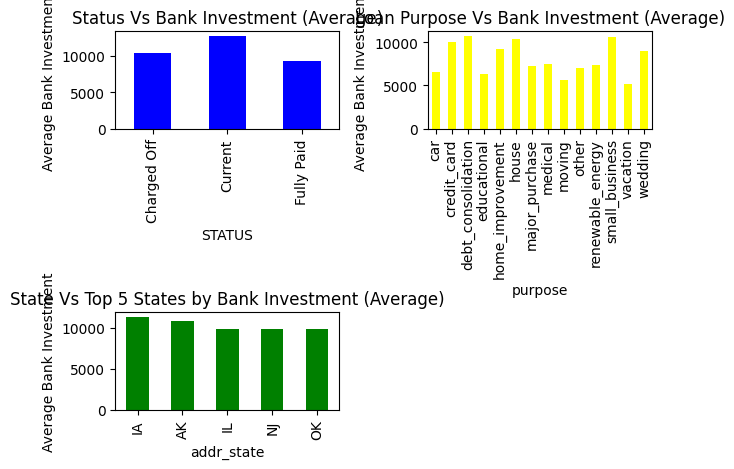

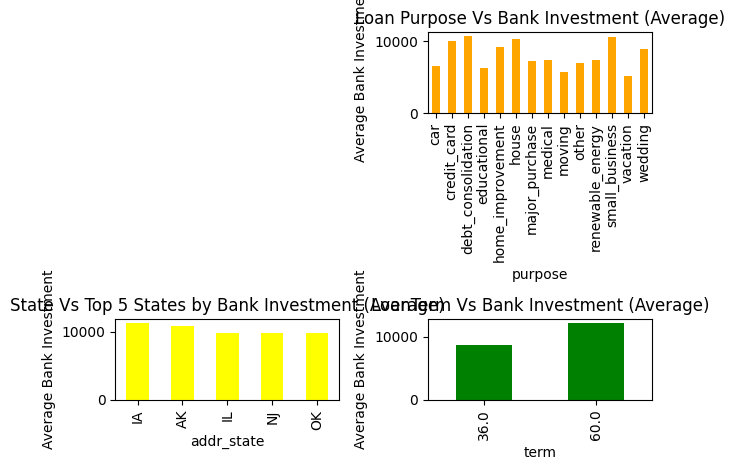

In [25]:
# Plot 1: Status vs Bank Investment
plt.subplot(2, 2, 1)
loan.groupby('loan_status')['funded_amnt'].mean().plot(kind='bar', color='blue')
plt.title('Status Vs Bank Investment (Average)')
plt.xlabel('STATUS')
plt.ylabel('Average Bank Investment')


# Plot 2: Loan Purpose vs Bank Investment
plt.subplot(2, 2, 2)
loan.groupby('purpose')['funded_amnt'].mean().plot(kind='bar', color='yellow')
plt.title('Loan Purpose Vs Bank Investment (Average)')
plt.xlabel('purpose')
plt.ylabel('Average Bank Investment')

# Plot 3: State vs Bank Investment (Top 5 States by Investment)
plt.subplot(2, 2, 3)
loan.groupby('addr_state')['funded_amnt'].mean().nlargest(5).plot(kind='bar', color='green')
plt.title('State Vs Top 5 States by Bank Investment (Average)')
plt.xlabel('addr_state')
plt.ylabel('Average Bank Investment')
plt.tight_layout()
plt.show()


plt.subplot(2, 2, 2)
loan.groupby('purpose')['funded_amnt'].mean().plot(kind='bar', color='orange')
plt.title('Loan Purpose Vs Bank Investment (Average)')
plt.xlabel('purpose')
plt.ylabel('Average Bank Investment')

# Plot 3: State vs Bank Investment (Top 5 States by Investment)
plt.subplot(2, 2, 3)
loan.groupby('addr_state')['funded_amnt'].mean().nlargest(5).plot(kind='bar', color='yellow')
plt.title('State Vs Top 5 States by Bank Investment (Average)')
plt.xlabel('addr_state')
plt.ylabel('Average Bank Investment')

# Plot 4: LoanTerm vs Bank Investment
plt.subplot(2, 2, 4)
loan.groupby('term')['funded_amnt'].mean().plot(kind='bar', color='green')
plt.title('LoanTerm Vs Bank Investment (Average)')
plt.xlabel('term')
plt.ylabel('Average Bank Investment')

# Adjust layout
plt.tight_layout()
plt.show()


Multivariate Analysis: Pairplot to explore relationships among multiple variables
Focus on key variables: loan_amnt, int_rate_clean, annual_inc, dti, and loan_status

<Figure size 1200x800 with 0 Axes>

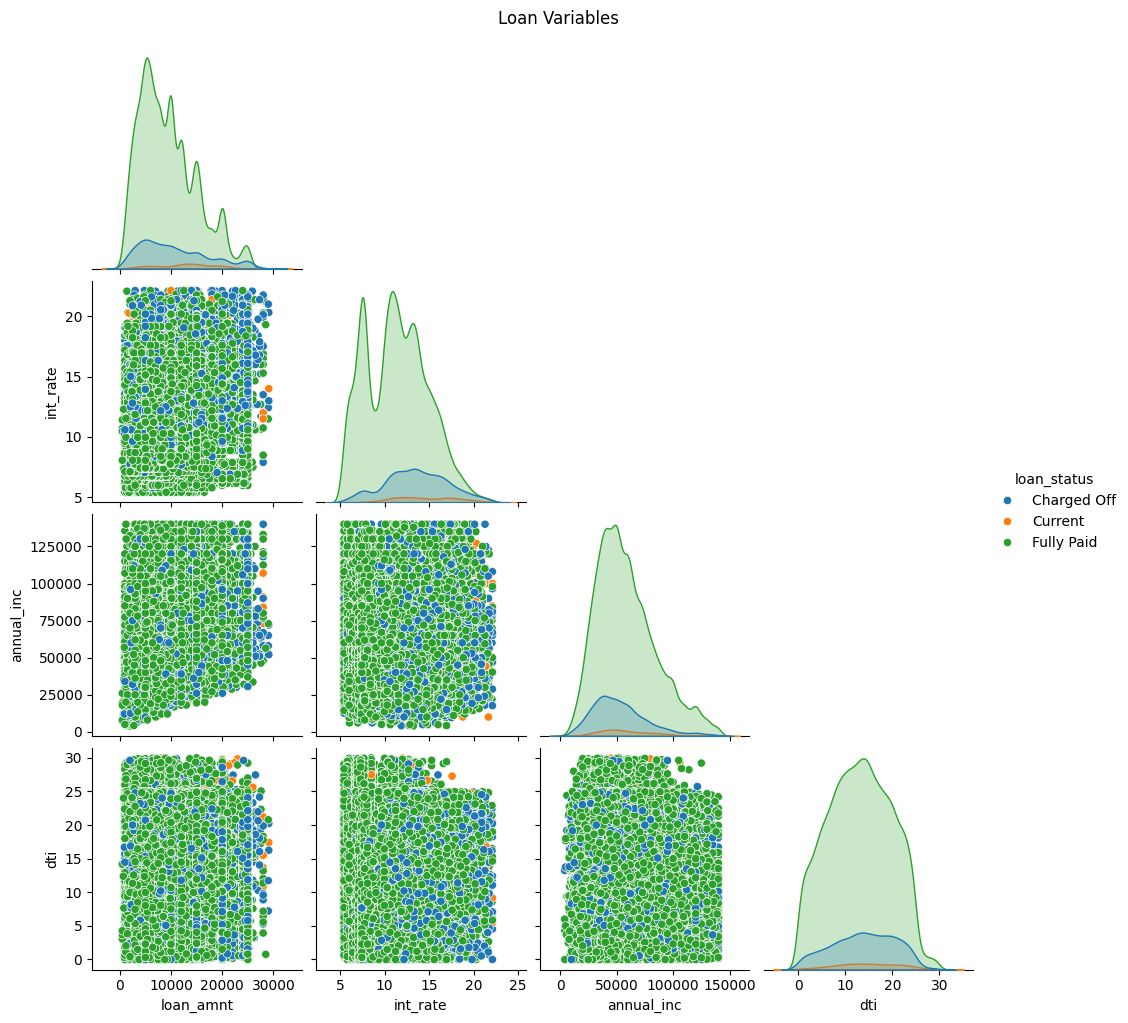

In [29]:
# Convert loan_status to categorical for clearer distinction
loan['loan_status'] = loan['loan_status'].astype('category')

# Select relevant columns for the pairplot
selected_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']

# Drop missing values to avoid plotting issues
loan_data_clean = loan[selected_columns].dropna()

# Plot the pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(loan_data_clean, hue='loan_status', diag_kind='kde', corner=True)
plt.suptitle('Loan Variables', y=1.02)
plt.show()


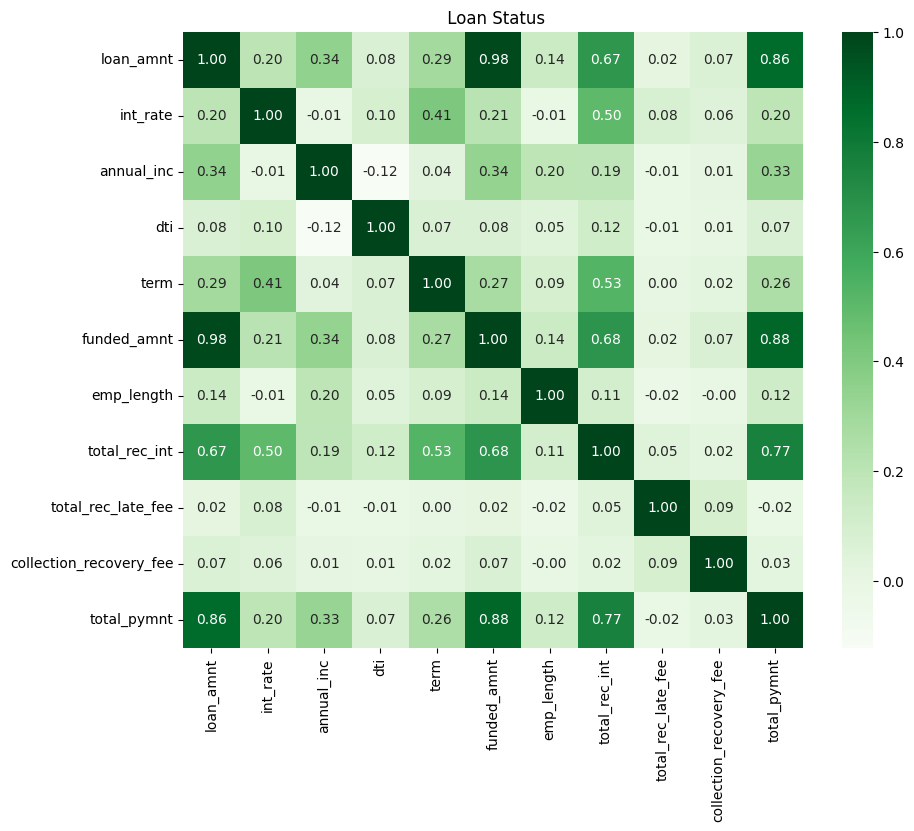

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the required columns
selected_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti',
                    'term', 'funded_amnt', 'emp_length', 'total_rec_int',
                    'total_rec_late_fee', 'collection_recovery_fee', 'total_pymnt']


# Create a clean dataset by dropping missing values
loan_data_clean = loan[selected_columns].dropna()

# Compute the correlation matrix for the selected columns
corr = loan_data_clean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a color palette and labels
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f")

# Set title and show the plot
plt.title(" Loan Status")
plt.show()
